In [1]:
import numpy as np
from numba import jit
from timeit import timeit
import matplotlib.pyplot as plt

In [2]:
# Luo vektorit NumPy-pohjaista ajonottoa varten.

a_array = np.random.randn(10**3)
b_array = np.random.randn(10**3)

# Luo listat Python-pohjaista ajonottoa varten.

a_list = list(a_array)
b_list = list(b_array)

In [3]:
# Tulostetaan kaikista ensimmäiset 10, jotta nähdään, että sisältävät lukuja. 

print("NumPy a_array (head):\n", a_array[:10])
print("NumPy b_array (head):\n", b_array[:10])
print("\na_list (head):\n", a_list[:10])
print("\nb_list (head):\n", b_list[:10])

NumPy a_array (head):
 [-0.25175801 -1.31406029 -0.24133439  1.15022476 -0.86798695  0.28982036
  0.58451588  0.60683853  0.44738528 -0.67520176]
NumPy b_array (head):
 [-0.70440691  0.11528539  1.16195085  0.45827554  0.00295295 -0.31425678
  1.21269268 -0.40475974  0.75327475 -0.64842686]

a_list (head):
 [-0.2517580081845451, -1.3140602862614745, -0.24133438978779467, 1.1502247555466019, -0.8679869526938955, 0.2898203638985574, 0.5845158778230031, 0.6068385295764961, 0.44738528281892703, -0.6752017575828714]

b_list (head):
 [-0.704406907673781, 0.11528539327305247, 1.1619508529035911, 0.4582755416825712, 0.0029529461010060595, -0.3142567821730671, 1.2126926801604712, -0.40475973595023235, 0.7532747486891841, -0.6484268642311184]


In [4]:
def dot(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [5]:
@jit(nopython=True)
def dot_numba(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a, b):
        dot_product += a * b
    
    return dot_product

In [6]:
@jit(nopython=True)
def dot_np_numba(a, b):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    return np.dot(a, b)

In [7]:
# dot-funktion ajo listoilla 
list_time = timeit(lambda: dot(a_list, b_list), number=10000)

print((list_time * 1000), "ms")

2143.1781999999657 ms


In [8]:
# Vertailun vuoksi saman dot-funktion ajo NumPy-taulukoilla.
np_arr_time = timeit(lambda: dot(a_array, b_array), number=10000)

print((np_arr_time * 1000), "ms")

3258.8150999999925 ms


In [17]:
# Numban ensimmäinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print((numba_time * 1000), "ms")

24.39219999996567 ms


In [18]:
# Numban toinen ajo
numba_time = timeit(lambda: dot_numba(a_array, b_array), number=10000)

print((numba_time * 1000), "ms")

18.309399999907328 ms


In [19]:
# NumPyn oma dot-operaatio
numpy_time = timeit(lambda: np.dot(a_array, b_array), number=10000)

print((numpy_time * 1000), "ms")

38.63059999980578 ms


In [20]:
# Numba + NumPy ensimmäinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print((numba_plus_numpy_time * 1000), "ms")

19.828700000061872 ms


In [21]:
# Numba + NumPy toinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print((numba_plus_numpy_time * 1000), "ms")

8.089200000085839 ms


In [22]:
# Numba + NumPy toinen ajo
numba_plus_numpy_time = timeit(lambda: dot_np_numba(a_array, b_array), number=10000)

print((numba_plus_numpy_time * 1000), "ms")

19.515299999966373 ms


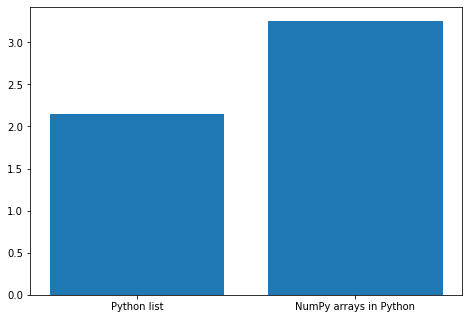

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Python list','NumPy arrays in Python']
students = [list_time, np_arr_time]
ax.bar(langs,students)
plt.show()

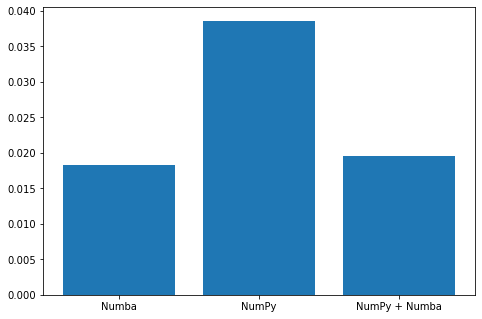

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Numba', 'NumPy', 'NumPy + Numba']
students = [numba_time, numpy_time, numba_plus_numpy_time]
ax.bar(langs,students)
plt.show()